In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import matplotlib as mpl
# import umap.plot
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Set current working directory
print(os.getcwd())
os.chdir('/share/data/analyses/christa/colopaint3D/spher_colo52_v1/')
print(os.getcwd())


cell_line = "HCT116"



2025-06-13 12:51:08.810365: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 12:51:08.836262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/share/data/analyses/christa/colopaint3D/spher_colo52_v1/3_Figure2/RemoveNoise
/share/data/analyses/christa/colopaint3D/spher_colo52_v1


In [2]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))
def inverse_pDose(y):
    '''Inverse function of pDose'''
    return 10**(-y) / 1e-6
def list_features(df):
    # List features
    list_of_selected_features = list(df.columns.values)
    list_of_metadata = list(df.columns[df.columns.str.contains("Metadata_")])
    list_of_selected_features = list(set(list_of_selected_features) - set(list_of_metadata))
    return list_of_selected_features

In [3]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

In [4]:
# Load the data
file = '1_Data/results/normalized_data_HCT116.csv'
# file = '1_Data/results/normalized_data_no_slice_HCT116.csv'
data = pd.read_csv(file)
data = data.query('Metadata_name == "dmso"')
cmap = sns.color_palette("YlOrRd", n_colors=len(data['Metadata_Site'].unique()))

In [5]:
# Calculate the PCA embedding
training_data = data.loc[:, list_features(data)].values
# Perform PCA
pca = PCA(n_components=2)
pca.fit(training_data)
embedding= pca.transform(training_data)

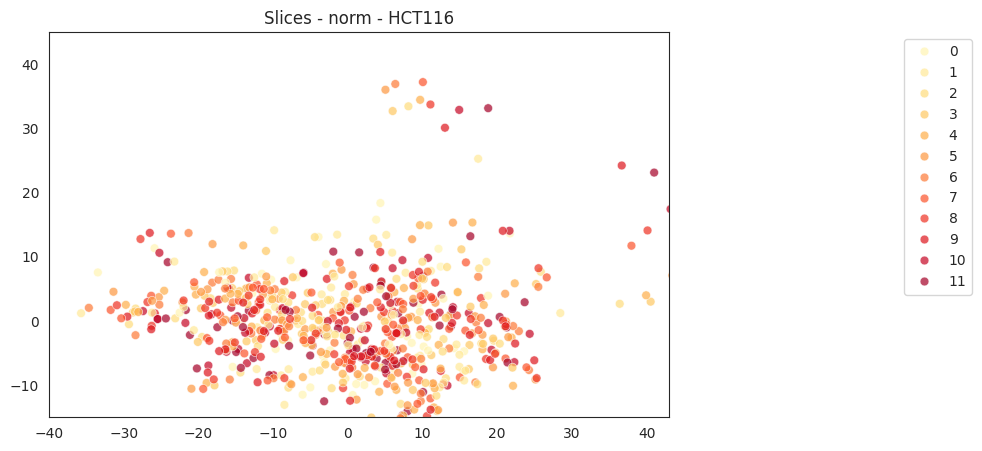

In [6]:
## Pathways
## PCA - Pathway
fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=data.Metadata_Site,
    alpha=(0.7),
    marker="o",
    palette=cmap,
    s=40,
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )

plt.xlim([-40, 43])
plt.ylim([-15,45])

plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.title('Slices - norm' + ' - ' + cell_line)
plt.show()
# fig.savefig(
#         "PCA_aggregates_slicenorm_{}.{}".format(cell_line, figformat), dpi=dpi, bbox_inches="tight"
#         )

In [7]:

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Get feature names
features = list_features(data)

# Create a DataFrame of loadings
loadings_df = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])

# Sort by absolute value for each component
sorted_PC1 = loadings_df['PC1'].abs().sort_values(ascending=False)
sorted_PC2 = loadings_df['PC2'].abs().sort_values(ascending=False)

# Display top contributors
print("Top features for PC1:")
print(sorted_PC1.head(10))

print("\nTop features for PC2:")
print(sorted_PC2.head(10))



Top features for PC1:
Intensity_StdIntensity_HOECHST_cells                         0.922460
Intensity_StdIntensity_HOECHST_nuclei                        0.911570
RadialDistribution_ZernikeMagnitude_PHAandWGA_2_2_cells      0.886737
RadialDistribution_ZernikeMagnitude_PHAandWGA_8_4_cells      0.885440
RadialDistribution_ZernikeMagnitude_PHAandWGA_9_3_cells      0.882953
RadialDistribution_ZernikeMagnitude_HOECHST_4_2_cytoplasm    0.882686
Intensity_StdIntensityEdge_CONC_cytoplasm                    0.879774
RadialDistribution_ZernikeMagnitude_PHAandWGA_6_6_cells      0.879381
RadialDistribution_ZernikeMagnitude_PHAandWGA_9_5_cells      0.879165
RadialDistribution_ZernikeMagnitude_PHAandWGA_8_6_cells      0.876908
Name: PC1, dtype: float64

Top features for PC2:
Correlation_K_HOECHST_MITO_cells                   0.765855
Granularity_1_MITO_nuclei                          0.758787
Correlation_K_MITO_HOECHST_cells                   0.758358
Granularity_2_SYTO_nuclei                        

In [8]:
# Load the data
# file = '1_Data/results/normalized_data_HCT116.csv'
file1 = '1_Data/results/normalized_data_no_slice_HCT116.csv'
data1 = pd.read_csv(file1)
data1 = data1.query('Metadata_name == "dmso"')
cmap = sns.color_palette("YlOrRd", n_colors=len(data1['Metadata_Site'].unique()))

In [9]:
# Calculate the PCA embedding
training_data1 = data1.loc[:, list_features(data1)].values
# Perform PCA
pca = PCA(n_components=2)
pca.fit(training_data1)
embedding1= pca.transform(training_data1)

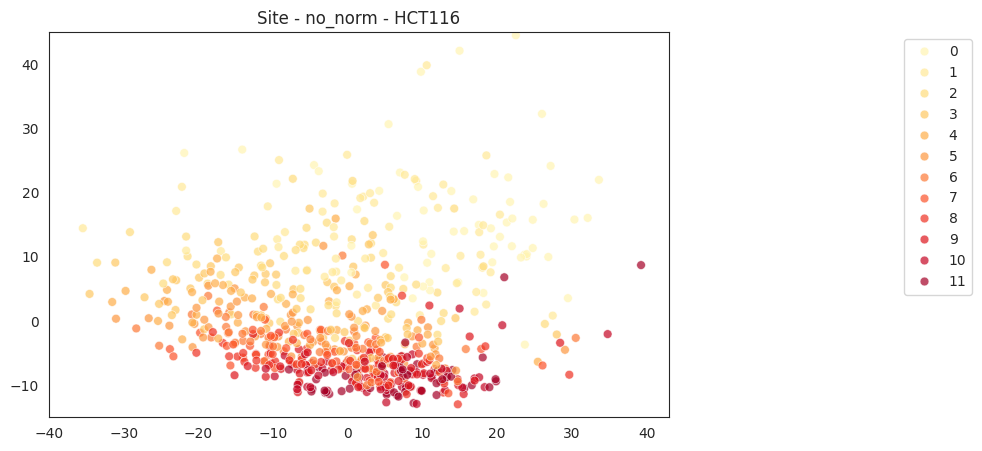

In [10]:
## PCA - Pathway
fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x=embedding1[:, 0],
    y=embedding1[:, 1],
    hue=data1.Metadata_Site,
    alpha=(0.7),
    marker="o",
    palette=cmap,
    s=40,




    
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )
plt.xlim([-40, 43])
plt.ylim([-15,45])
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.title('Site - no_norm' + ' - ' + cell_line)
plt.show()
# fig.savefig(
#         "PCA_aggregates_noslicenorm_{}.{}".format(cell_line, figformat), dpi=dpi, bbox_inches="tight"
#         )

In [11]:

# print("Loadings:")
# print(loadings)

# plt.figure(figsize=(10, 100))
# sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=['PC1', 'PC2'], yticklabels=list_features(data))
# plt.title('Feature Importance in Principal Components')
# plt.show()

In [12]:

loadings1 = pca.components_.T * np.sqrt(pca.explained_variance_)
# Get feature names
features1 = list_features(data1)

# Create a DataFrame of loadings
loadings_df1 = pd.DataFrame(loadings1, index=features1, columns=['PC1', 'PC2'])

# Sort by absolute value for each component
sorted_PC1 = loadings_df1['PC1'].abs().sort_values(ascending=False)
sorted_PC2 = loadings_df1['PC2'].abs().sort_values(ascending=False)

# Display top contributors
print("Top features for PC1:")
print(sorted_PC1.head(10))

print("\nTop features for PC2:")
print(sorted_PC2.head(10))


Top features for PC1:
Intensity_StdIntensity_HOECHST_cells                           0.916369
RadialDistribution_ZernikeMagnitude_PHAandWGA_2_2_cells        0.878227
RadialDistribution_ZernikeMagnitude_MITO_6_2_cells             0.875139
RadialDistribution_ZernikeMagnitude_HOECHST_4_2_cytoplasm      0.873588
RadialDistribution_ZernikeMagnitude_PHAandWGA_5_3_cells        0.871218
RadialDistribution_ZernikeMagnitude_PHAandWGA_9_7_cells        0.870182
RadialDistribution_ZernikeMagnitude_PHAandWGA_5_3_nuclei       0.863130
RadialDistribution_ZernikeMagnitude_PHAandWGA_7_1_cytoplasm    0.862438
RadialDistribution_ZernikeMagnitude_PHAandWGA_9_5_nuclei       0.858427
RadialDistribution_ZernikeMagnitude_PHAandWGA_6_4_cells        0.857296
Name: PC1, dtype: float64

Top features for PC2:
RadialDistribution_MeanFrac_MITO_1of4_cytoplasm       0.898825
RadialDistribution_MeanFrac_SYTO_1of4_cytoplasm       0.875703
RadialDistribution_MeanFrac_SYTO_2of4_cytoplasm       0.871489
RadialDistribution_M

In [13]:
# # Compute absolute difference
# diff_df = (loadings_df1 - loadings_df).abs()

# # Optionally: Combine differences across PCs
# diff_df['Total_Diff'] = np.sqrt(diff_df['PC1']**2 + diff_df['PC2']**2)

# # Sort by most changed
# most_changed = diff_df.sort_values(by='Total_Diff', ascending=False)

# # Show top N
# print("Top features most changed by normalization:")
# print(most_changed.head(10))


In [20]:
# Find common features

features_before = set(features1)
features_after = set(features)

common_features = list(features_before & features_after)

# Subset to common features
df_before_common = loadings_df1.loc[common_features]
df_after_common = loadings_df.loc[common_features]

# Compute absolute difference
diff_df = (df_before_common - df_after_common).abs()

# Euclidean difference across PCs
diff_df['Total_Diff'] = np.sqrt(diff_df.pow(2).sum(axis=1))

# Sort by difference
most_changed = diff_df.sort_values(by='Total_Diff', ascending=False)

# Display
print("Top features most changed between unnormalized and normalized data:")
print(most_changed.head(10))


Top features most changed between unnormalized and normalized data:
                                                         PC1       PC2  \
RadialDistribution_ZernikeMagnitude_HOECHST_2_0...  0.446406  0.966033   
RadialDistribution_ZernikeMagnitude_CONC_2_0_cells  0.405672  0.931335   
Correlation_Correlation_CONC_SYTO_cytoplasm         0.203331  0.895698   
RadialDistribution_ZernikeMagnitude_HOECHST_4_0...  0.128960  0.875543   
RadialDistribution_ZernikeMagnitude_HOECHST_6_0...  0.356624  0.808094   
AreaShape_Zernike_0_0_nuclei                        0.105600  0.822911   
RadialDistribution_ZernikeMagnitude_CONC_6_0_cells  0.283124  0.774524   
AreaShape_Zernike_6_6_nuclei                        0.186787  0.743111   
AreaShape_Zernike_4_0_nuclei                        0.106268  0.754644   
RadialDistribution_ZernikeMagnitude_MITO_2_0_cells  0.443298  0.606265   

                                                    Total_Diff  
RadialDistribution_ZernikeMagnitude_HOECHST_2_0...  

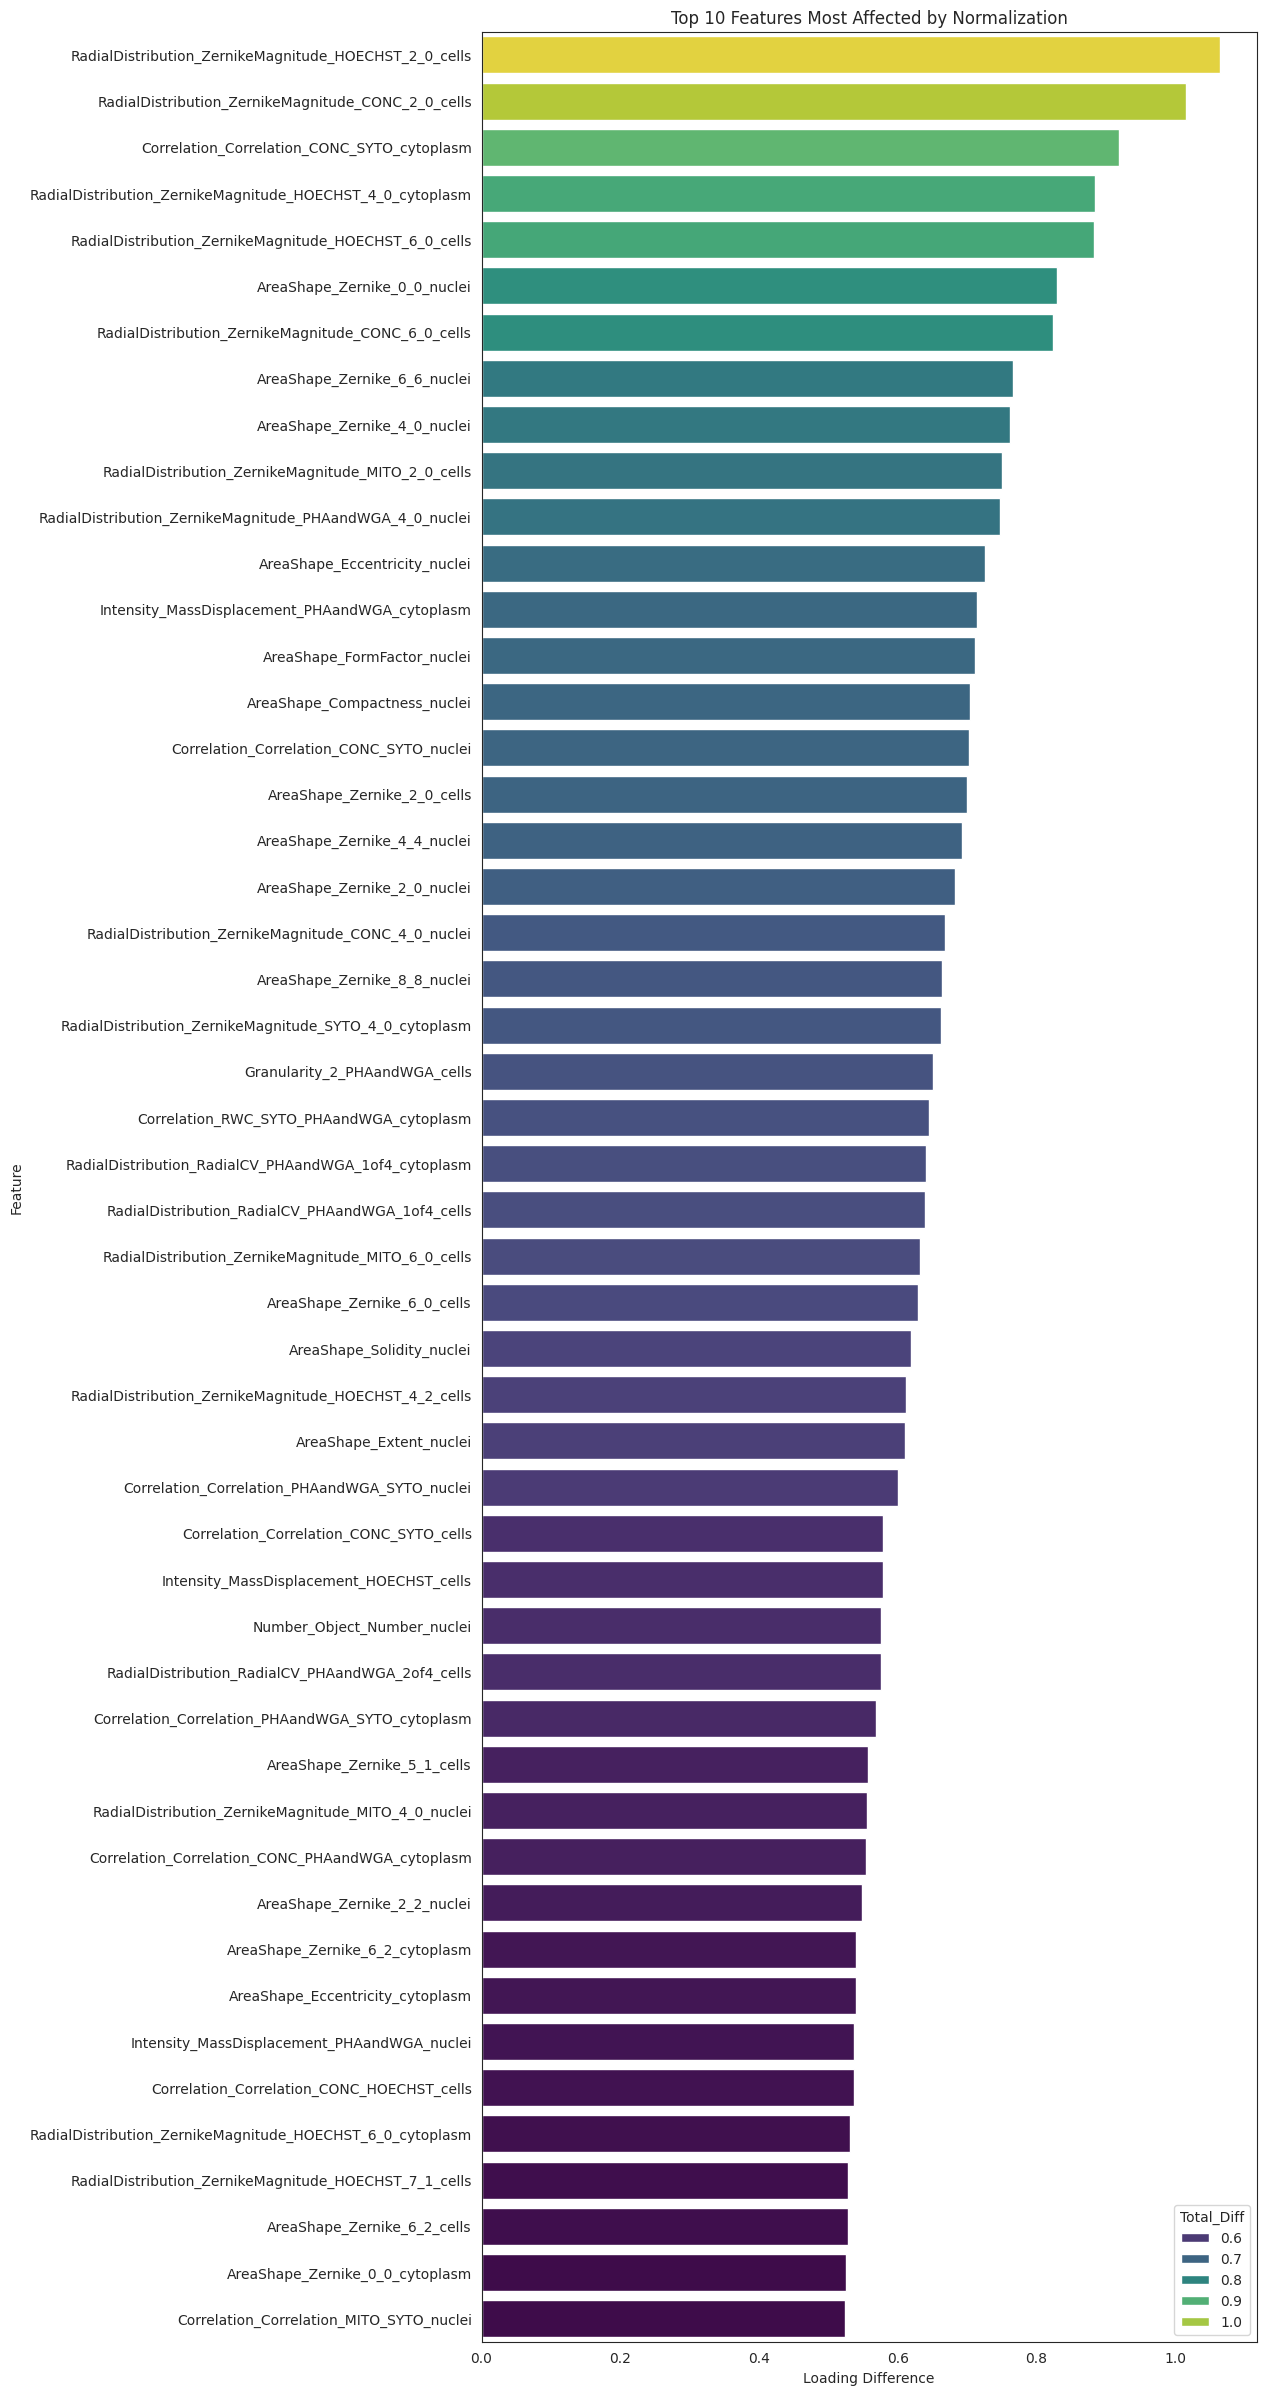

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 30))
sns.barplot(y=most_changed.index[:50], x=most_changed['Total_Diff'][:50], palette='viridis', hue=most_changed['Total_Diff'][:50])
plt.title('Top 10 Features Most Affected by Normalization')
plt.xlabel('Loading Difference')
plt.ylabel('Feature')
plt.show()
